In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
import matplotlib.colors as mcolors

def load_time_curve_timeAcc(thds, snr=None, th_acc=None, show_acc_range=False, pretrained=False):
    print("\n-----------Loading SNR{}dB-------------".format(snr))

    if pretrained:
        # Transfer learning time_curve results
        if snr==35 or snr==25 or snr==30:
            path = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_vae_PA_transfer_fixed/snr"+str(snr)+"/remote/time_curve_retrain_with_seeds/"
        elif snr==5 or snr==15 or snr == 10 or snr==20:
            path = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_vae_PA_transfer_fixed/snr"+str(snr)+"/remote/time_curve/"
    else:
        ## New training results
        if snr == 35 or snr == 30:
            path = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_vae_PA_fixed/snr"+str(snr)+"/time_curve_merge/"
        else:
            path = "G:/My Drive/CMU/Research/attacker/code/ML/checkpoint2/gan/gan_vae_PA_fixed/snr"+str(snr)+"/time_curve/"
    
    paths = [path]
    files = [os.listdir(p) for p in paths]
    for i in range(len(files)):
        print("files{} len:{}".format(i, len(files[i])))

    cnt=0
    acc_range=[(0, 0.1), (0.1, 0.2), (0.2, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1.01)]
    cnt_range=[[] for _ in range(len(acc_range))]

    timer_curve_all={}
    for idx in range(len(paths)):
        path = paths[idx]
        filelist = files[idx]
        for file in filelist:
            file_name_len = 3 if pretrained else 4
            if file.split('.')[-1] == 'npy' and len(file.split("_"))==file_name_len:
                rfflabel = int(file.split('_')[-1].split('.')[0])
                dict_load = np.load(path+file, allow_pickle=True).item()
                val_acc = dict_load[rfflabel][-1][-1]
                if rfflabel not in timer_curve_all.keys():
                    for i in range(len(acc_range)):
                        (x,y) = acc_range[i]
                        if x<=val_acc<y :
                            cnt_range[i].append(rfflabel)
                            cnt+=1
                    if th_acc[0]<=val_acc<th_acc[1]: 
                        timer_curve_all.update(dict_load)
                else:
                    max_time_pre = timer_curve_all[rfflabel][-2][-1]
                    val_acc = dict_load[rfflabel][-1][-1]
                    max_time = dict_load[rfflabel][-2][-1]
                    if max_time<=max_time_pre:
                        timer_curve_all.update(dict_load)
                        for i in range(len(acc_range)):
                            if rfflabel in cnt_range[i]:
                                cnt_range[i].remove(rfflabel)
                        for i in range(len(acc_range)):
                            (x,y) = acc_range[i]
                            if x<=val_acc<y:
                                cnt_range[i].append(rfflabel)
                                
    print("#cnt_range:", cnt)
    if show_acc_range:
        for i in range(len(acc_range)):
            print("acc_range:{}, cnt:{}".format(acc_range[i], len(cnt_range[i])))

    rfflabels = list(timer_curve_all.keys())
    # print("#{} rfflabels in time_curve_all: {}".format(len(rfflabels), rfflabels))
    if len(rfflabels)<219:
        print("#miss rfflabel:", 219-len(rfflabels), end=' ')
        for i in range(1, 220):
            if i not in rfflabels:
                print(i, end=', ')
    else:
        print("No missing rffs")

    time_thds=np.zeros((len(timer_curve_all.keys()), len(thds)))

    for rff in timer_curve_all.keys():
        train_time_step, train_time, train_acc_fake_curve, test_time_step, test_time, val_acc_fake_curve = timer_curve_all[rff]
        for thdi in range(len(thds)):
            thd = thds[thdi]
            for i in range(len(test_time)):
                val_acc = val_acc_fake_curve[i]
                if val_acc>=thd:
                    time_thds[rff-1, thdi]=test_time[i]
                    break

    print("SNR:{}".format(snr), end=", ")
    time_thds = np.mean(time_thds, axis=0)
    for thdi in range(len(thds)):
        thd = thds[thdi]
        print("({}, {})".format(thd, time_thds[thdi]), end=", ") if thdi<len(thds)-1 else print("({}, {})".format(thd, time_thds[thdi]))

    return timer_curve_all, time_thds


-----------Loading SNR30dB-------------
files0 len:220


#cnt_range: 219
No missing rffs
SNR:30, (0.9, 9.600580911113791), (0.91, 9.545294359938739), (0.92, 9.39606033721471), (0.93, 9.054118775885943), (0.94, 8.356694772363253), (0.95, 6.859584734320096), (0.96, 5.875470752585424), (0.97, 4.398780006251923), (0.98, 3.0801493283276145), (0.99, 2.2447585776516292)

-----------Loading SNR20dB-------------
files0 len:220
#cnt_range: 219
No missing rffs
SNR:20, (0.9, 16.054888646896572), (0.91, 16.14686199628055), (0.92, 16.054463706604423), (0.93, 15.368135096275644), (0.94, 15.009443616213863), (0.95, 13.474012713454085), (0.96, 11.729438820930376), (0.97, 10.117894518865297), (0.98, 7.5691238081074195), (0.99, 3.4624754555149164)

-----------Loading SNR10dB-------------
files0 len:220
#cnt_range: 219
No missing rffs
SNR:10, (0.9, 13.190504347352677), (0.91, 13.301702311049858), (0.92, 12.704667109877008), (0.93, 12.393517876324589), (0.94, 11.70417185896608), (0.95, 10.32686100267384), (0.96, 8.670565458193217), (0.97, 7.136287579253384), (0.

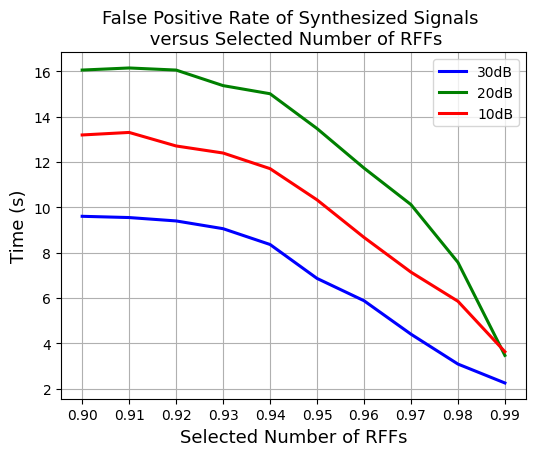

In [23]:
SNRs_all=[ 35, 30, 25, 20, 15, 10, 5]
SNRs_30 =[30, 20, 10]
SNRs_35=[ 25, 15, 5]
SNRs = SNRs_30
ths_acc={5:(0, 1.01), 10:(0, 1.01), 15:(0, 1.01), 20:(0., 1.01), 25:(0, 1.01), 30:(0, 1.01), 35:(0, 1.01)}
thds=[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99] 
num_thds=[100, 150, 180, 200, 210, 219]
time_stops = [60, 90, 120]

fig1, ax1 = plt.subplots(figsize=(6, 4.5))
colors=list(mcolors.BASE_COLORS)[:len(SNRs)] # snr
markers = ['o', 'D', 's'] # time_stop
linestyles=[':', '-.', '-']
for snri in range(len(SNRs)):
    SNR = SNRs[snri]

    timer_curve_all, time_thds = load_time_curve_timeAcc(
                                                        thds=thds, 
                                                        snr=SNR, 
                                                        th_acc=ths_acc[SNR], 
                                                        pretrained=True)
    
    ax1.plot(thds,time_thds, color=colors[snri], linewidth=2.2, markersize=7, label="{}dB".format(SNR,))
    # ax1.hlines(y=acc_num_thds_intimestop[-1], xmin=98, xmax=219, linewidth=2.2, linestyle=linestyles[time_stopi], color=colors[snri], linestyles=':')
    ax1.set_xlabel("Selected Number of RFFs", fontsize=13)
    ax1.set_ylabel("Time (s)", fontsize=13)
    ax1.set_title("False Positive Rate of Synthesized Signals \n versus Selected Number of RFFs", fontsize=13)
    # ax1.set_xlim([98, 222])
    # ax1.set_ylim([0.87, 0.975])
    # ax1.set_yticks([ 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98])
    ax1.set_xticks(thds)
    ax1.grid()
    ax1.legend()
# fig1.savefig("./checkpoint2/results/figure/pa_fpr_numrffs_intimestops.svg")
plt.show()


-----------Loading SNR35dB-------------
files0 len:221
#cnt_range: 220
No missing rffs
SNR:35, (0.8, 10.833645330775868), (0.8200000000000001, 10.885264932025562), (0.8400000000000001, 10.955653576417403), (0.8600000000000001, 11.060478187691082), (0.8800000000000001, 10.986741850592873), (0.9000000000000001, 11.187647409872575), (0.9200000000000002, 10.458538286252455), (0.9400000000000002, 8.96137350580909)

-----------Loading SNR30dB-------------
files0 len:221
#cnt_range: 220
No missing rffs
SNR:30, (0.8, 9.510494844479995), (0.8200000000000001, 9.561309419978748), (0.8400000000000001, 9.636322500488975), (0.8600000000000001, 9.705114677819338), (0.8800000000000001, 9.7864295092496), (0.9000000000000001, 10.02625655260953), (0.9200000000000002, 10.045798313617706), (0.9400000000000002, 8.628110616857356)

-----------Loading SNR25dB-------------
files0 len:221
#cnt_range: 220
No missing rffs
SNR:25, (0.8, 14.097608595544642), (0.8200000000000001, 14.151795057816939), (0.84000000000

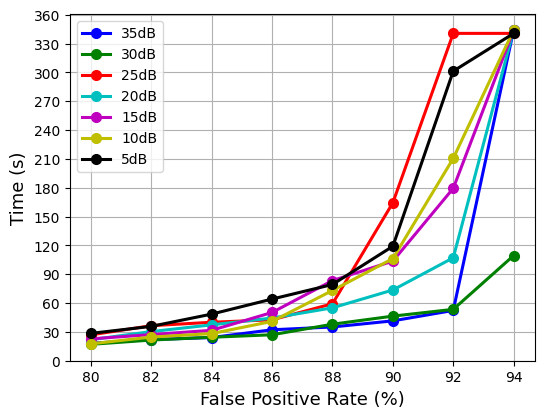

In [45]:
## Plot not tranfer results
import matplotlib.colors as mcolors
def plot_timer_all(timer_curve_all_SNRs, SNRs=None, linestyles=None):
    fig1, ax1 = plt.subplots(figsize=(6, 4.5))
    acc60all=[]
    for snri in range(len(SNRs)):
        SNR=SNRs[snri]
        print("\n---------------Plot SNR{}dB----------------".format(SNR))
        timer_curve_all = timer_curve_all_SNRs[SNR]
        train_step_avg=[]
        test_step_avg=[]
        train_time_1stepoch=[]
        test_time_1stepoch=[]
        train_acc_avg=[]
        test_acc_avg=[]
        max_len=0
        for rfflabel in timer_curve_all.keys():
            train_time_step, train_time, train_acc_fake_curve, test_time_step, test_time, val_acc_fake_curve = timer_curve_all[rfflabel]
            max_len = max(max_len, len(train_time_step))
            train_time_1stepoch.append(train_time_step[0])
            test_time_1stepoch.append(test_time_step[0])
            train_step_avg.append(np.mean(train_time_step[1:]))
            test_step_avg.append(np.mean(test_time_step[1:]))
            # print("rfflabel:{}, train/1st epoch time:{}, train/avg time step:{}, test/1st epoch time:{}, test/avg time step:{}".format(
            #     rfflabel, train_time_1stepoch[-1], train_step_avg[-1], test_time_1stepoch[-1], test_step_avg[-1]))

        train_time_1stepoch_avg = np.mean(train_time_1stepoch)
        test_time_1stepoch_avg = np.mean(test_time_1stepoch)
        train_step_avg = np.mean(train_step_avg)
        test_step_avg = np.mean(test_step_avg)
        train_time_curve = [train_time_1stepoch_avg]
        test_time_curve = [test_time_1stepoch_avg]
        print("train/avg 1st epoch time:{}, train/avg time step:{}, test/avg 1st epoch time:{}, test/avg time step:{}".format(
                train_time_1stepoch_avg, train_step_avg, test_time_1stepoch_avg, test_step_avg))

        for i in range(1, max_len - len(train_time_curve)+1):
            train_time_curve.append(train_time_curve[-1]+train_step_avg)

        for i in range(1, max_len - len(test_time_curve)+1):
            test_time_curve.append(test_time_curve[-1]+test_step_avg)

        for rfflabel in timer_curve_all.keys():
            train_time_step, train_time, train_acc_fake_curve, test_time_step, test_time, val_acc_fake_curve = timer_curve_all[rfflabel]
            if val_acc_fake_curve[-1]==0:
                continue
            train_acc_fake_curve += [train_acc_fake_curve[-1] for i in range(1, max_len - len(train_acc_fake_curve)+1)]
            val_acc_fake_curve += [val_acc_fake_curve[-1] for i in range(1, max_len - len(val_acc_fake_curve)+1)]
            if train_acc_avg == []:
                train_acc_avg=train_acc_fake_curve
                test_acc_avg = val_acc_fake_curve
            else:
                train_acc_avg=[a+b for (a,b) in zip(train_acc_avg, train_acc_fake_curve)]
                test_acc_avg=[a+b for (a,b) in zip(test_acc_avg, val_acc_fake_curve)]
        n_labels = len(list(timer_curve_all.keys()))
        train_acc_avg = [x/n_labels for x in train_acc_avg]
        test_acc_avg = [x/n_labels for x in test_acc_avg]

        train_acc60, test_acc60 = 0, 0
        train_acc60_t, test_acc_60_t = 0, 0
        train_epoch, test_epoch = 0, 0
        for i in range(len(train_time_curve)):
            if 0<=60-train_time_curve[i]<1: # <0.15 when testing with tranfer learning results
                train_acc60 = max(train_acc60, train_acc_avg[i])
                train_acc60_t = train_time_curve[i]
                train_epoch = i
            if 0<=60-test_time_curve[i]<1:
                test_acc60 = max(test_acc60, test_acc_avg[i])
                test_acc_60_t = test_time_curve[i]
                test_epoch = i

        max_train_time = train_time_curve[-1]
        max_test_time = test_time_curve[-1]
        train_acc60, test_acc60 = np.round(train_acc60, 4), np.round(test_acc60, 4)
        train_acc60_t, test_acc_60_t = np.round(train_acc60_t, 4), np.round(test_acc_60_t, 4)
        acc60all.append(100*test_acc60)
        print("train_acc60:{}, time:{}, epoch:{}; test_acc60:{}, time:{}, epoch:{}".format(train_acc60, train_acc60_t, train_epoch, test_acc60, test_acc_60_t, test_epoch))
        print("max_avg train_acc:{}, test_acc:{}".format(max(train_acc_avg), max(test_acc_avg)))
        print("train time last:{}, test time last:{}".format(max_train_time, max_test_time))
    
        time_thds=test_time_curve[-1]*np.ones((len(thds),))
        for thdi in range(len(thds)):
            thd = thds[thdi]
            for i in range(len(test_time_curve)):
                val_acc = test_acc_avg[i]
                if val_acc>=thd:
                    time_thds[thdi]=test_time_curve[i]
                    break
            if i==len(test_time_curve)-1 and val_acc<thd:
                break
        
        thds100 = [100*thd for thd in thds]
        ax1.plot(thds100, time_thds, color=colors[snri], marker='o', linewidth=2.2, markersize=7, label="{}dB".format(SNR,))
        ax1.set_xlabel("False Positive Rate (%)", fontsize=13)
        ax1.set_ylabel("Time (s)", fontsize=13)
        ax1.set_xticks(thds100)
        ax1.set_yticks(list(np.arange(start=0, stop=test_time_curve[-1]+29, step=30)))
        ax1.legend()
        ax1.grid()

    plt.show()

SNRs_all=[ 35, 30, 25, 20, 15, 10, 5]
SNRs_30 =[30, 20, 10]
SNRs_25=[ 25, 15, 5]
SNRs = SNRs_all
ths_acc={5:(0, 1.01), 10:(0, 1.01), 15:(0, 1.01), 20:(0., 1.01), 25:(0, 1.01), 30:(0, 1.01), 35:(0, 1.01)}
# thds=[0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99] 
thds = list(np.arange(start=0.8, stop=0.95, step=0.02))
num_thds=[100, 150, 180, 200, 210, 219]
time_stops = [60, 90, 120]
colors=list(mcolors.BASE_COLORS)[:len(SNRs)] # snr
markers = ['o', 'D', 's'] # time_stop
linestyles=[':', '-.', '-']

timer_curve_all_SNRs={}
for SNR in SNRs:
    timer_curve_all, time_thds = load_time_curve_timeAcc(thds=thds, snr=SNR, th_acc=ths_acc[SNR], pretrained=False)
    timer_curve_all_SNRs[SNR] = timer_curve_all
plot_timer_all(timer_curve_all_SNRs, SNRs, linestyles=linestyles)